In [1]:
import pandas as pd

import numpy as np
# import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import os

os.chdir("Z:\Shared\Amichai\All")


In [2]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "n.s."

In [3]:
c_easy = "#0d88e6"
c_hard = "#b30000"

data = pd.read_csv("results_h_e_division.csv")

data.drop(data[data['Mouse'] == '-1'].index, inplace=True)


0.14463750622555507


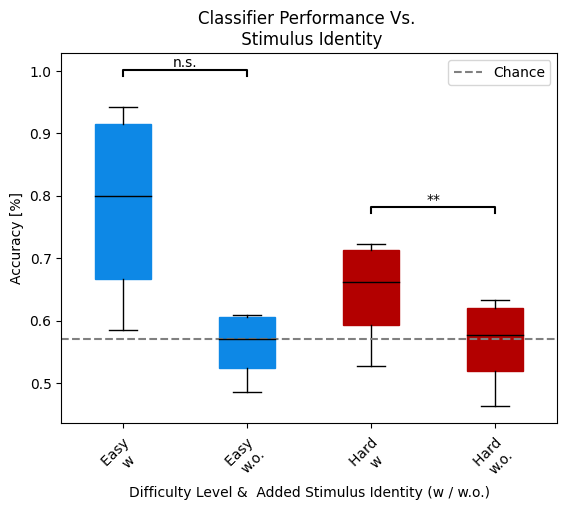

In [4]:

easy_w = data.loc[(data['Level'] == 'e') & (data['Cue added?'] == True) & (data['Previous Cue'] == False)]['Test_acc']
easy_wo = data.loc[(data['Level'] == 'e') & (data['Cue added?'] == False) & (data['Previous Cue'] == False)]['Test_acc']

hard_w = data.loc[(data['Level'] == 'h') & (data['Cue added?'] == True) & (data['Previous Cue'] == False)]['Test_acc']
hard_wo = data.loc[(data['Level'] == 'h') & (data['Cue added?'] == False) & (data['Previous Cue'] == False)]['Test_acc']

# One side t-test
stat, pvalue = stats.ttest_rel(easy_w, easy_wo)
e_astr = convert_pvalue_to_asterisks(pvalue)
print(pvalue)
stat, pvalue = stats.ttest_rel(hard_w, hard_wo)
h_astr = convert_pvalue_to_asterisks(pvalue)


fig, ax = plt.subplots()
fig.canvas.draw()
x = [1, 2, 3, 4]
ticks = ['Easy \nw', 'Easy \nw.o.', 'Hard \nw', 'Hard \nw.o.']

bplot = ax.boxplot([easy_w, easy_wo, hard_w, hard_wo], vert=True, labels=ticks, patch_artist=True)
plt.xticks(rotation=45)

bplot['boxes'][0].set_color(c_easy)
bplot['boxes'][1].set_color(c_easy)
bplot['boxes'][2].set_color(c_hard)
bplot['boxes'][3].set_color(c_hard)
for median in bplot['medians']:
    median.set_color('black')

# statistical annotation
x1, x2 = 1, 2  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = easy_w.max() + 0.05, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, e_astr, ha='center', va='bottom', color=col)

x1, x2 = 3, 4  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = hard_w.max() + 0.05, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, h_astr, ha='center', va='bottom', color=col)

plt.hlines(np.mean(data["Lick Bias"])/100, 0.5, 4.5, colors="gray", ls="--", label="Chance")
plt.title("Classifier Performance Vs. \n Stimulus Identity")
plt.legend()
plt.xlabel("Difficulty Level &  Added Stimulus Identity (w / w.o.)")
plt.ylabel("Accuracy [%]")
plt.savefig("fig1.svg", bbox_inches="tight", pad_inches=0.2)
plt.show()


In [5]:


prev_e_w = data.loc[(data['Level'] == 'e') & (data['Previous Cue'] == True) & (data['Cue added?'] == False)]['Test_acc']
prev_e_wo = data.loc[(data['Level'] == 'e') & (data['Previous Cue'] == False) & (data['Cue added?'] == False)][
    'Test_acc']

prev_h_w = data.loc[(data['Level'] == 'h') & (data['Previous Cue'] == True) & (data['Cue added?'] == False)]['Test_acc']
prev_h_wo = data.loc[(data['Level'] == 'h') & (data['Previous Cue'] == False) & (data['Cue added?'] == False)][
    'Test_acc']

# 2 side t-test
stat, pvalue = stats.ttest_rel(prev_e_w, prev_e_wo, alternative='greater')
e_astr = convert_pvalue_to_asterisks(pvalue)

stat, pvalue = stats.ttest_rel(prev_h_w, prev_h_wo, alternative='greater')
h_astr = convert_pvalue_to_asterisks(pvalue)


stat, pvalue1 = stats.ttest_rel(prev_e_w, prev_h_w, alternative='greater')
e_astr = convert_pvalue_to_asterisks(pvalue)

stat, pvalue2 = stats.ttest_rel(prev_e_wo, prev_h_wo, alternative='greater')
h_astr = convert_pvalue_to_asterisks(pvalue)

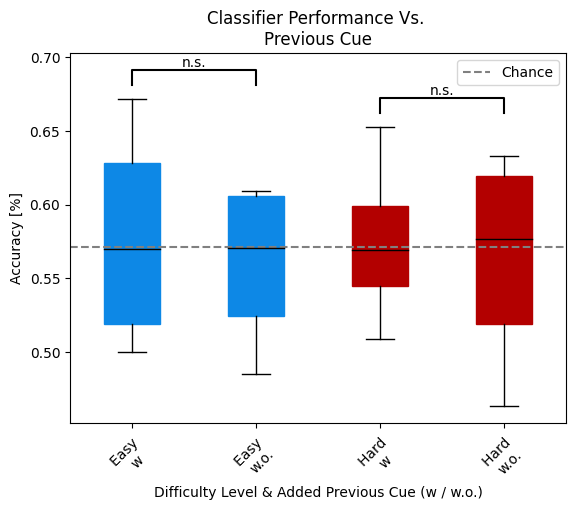

In [6]:



x = [1, 2, 3, 4]

ticks = ['Easy \nw', 'Easy \nw.o.', 'Hard \nw', 'Hard \nw.o.']

fig, ax = plt.subplots()

# We need to draw the canvas, otherwise the labels won't be positioned and
# won't have values yet.
fig.canvas.draw()

bplot = ax.boxplot([prev_e_w, prev_e_wo, prev_h_w, prev_h_wo], vert=True, labels=ticks, patch_artist=True)
plt.xticks(rotation=45)

bplot['boxes'][0].set_color(c_easy)
bplot['boxes'][1].set_color(c_easy)
bplot['boxes'][2].set_color(c_hard)
bplot['boxes'][3].set_color(c_hard)
for median in bplot['medians']:
    median.set_color('black')

# statistical annotation
x1, x2 = 1, 2  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = np.maximum(prev_e_w.max(), prev_e_wo.max()) + 0.01, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, e_astr, ha='center', va='bottom', color=col)

x1, x2 = 3, 4  # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = np.maximum(prev_h_w.max(), prev_h_wo.max()) + 0.01, 0.01, 'k'
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c=col)
plt.text((x1 + x2) * .5, y + h, h_astr, ha='center', va='bottom', color=col)

plt.hlines(np.mean(data["Lick Bias"])/100, 0.5, 4.5, colors="gray", ls="--", label="Chance")
plt.title("Classifier Performance Vs. \nPrevious Cue")
plt.legend()
plt.xlabel("Difficulty Level & Added Previous Cue (w / w.o.)")
plt.ylabel("Accuracy [%]")
plt.savefig("fig2.svg", bbox_inches="tight", pad_inches=0.2)
plt.show()


In [7]:
segments = np.load("Z:\Shared\Amichai\All\segmented_Features_n_label.npz")
X = segments['X']
level = segments['level']
name = segments['name']
stimuli_type = segments['stimuli_type']

In [8]:
def plot_trajectory(X, lev, stim, trails, body_parts, colors):
    fig, axs = plt.subplots(len(body_parts), 1, sharex=True, constrained_layout=True, )
    fig.canvas.draw()


    if lev == "e":
        lev = "Easy"
    else: lev = "Hard"

    if stim == True:
        stim = "Go"
    else:
        stim = "NoGo"


    for i, part in enumerate(body_parts):
        one = X[trails, :, i]
        mean = np.mean(one, axis=0)
        std = stats.sem(one, axis=0)
        time = np.linspace(0, 120, 120)

        axs[i].plot(time, mean, color=colors[i])
        axs[i].fill_between(time, mean - std, mean + std, color=colors[i], alpha=0.2)
        axs[i].vlines(60, (mean - std)[60] - 5, (mean + std)[60] + 5, ls="--", colors='red', label='Cue')
        axs[i].set_frame_on(False)
        axs[i].set_yticks([])
        axs[i].set_ylabel(part, rotation=0)

    a = np.around((axs[i].get_xticks() / 30) - 2, decimals=2, )
    # plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
    axs[i].set_xticklabels(a)

    axs[0].legend(loc='upper right', bbox_to_anchor=(1.1, 1.05))
    fig.supxlabel("Time [sec]")
    fig.supylabel("Distance from COM")
    plt.suptitle(f"Level: {lev} \nStimulus: {stim}")
    plt.savefig(f"feature_trajectory_level_{lev}_stimulus_{stim}.svg", bbox_inches="tight", pad_inches=0.2)

C:\Users\Owner\AppData\Local\Temp\ipykernel_16520\4157838918.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(a)


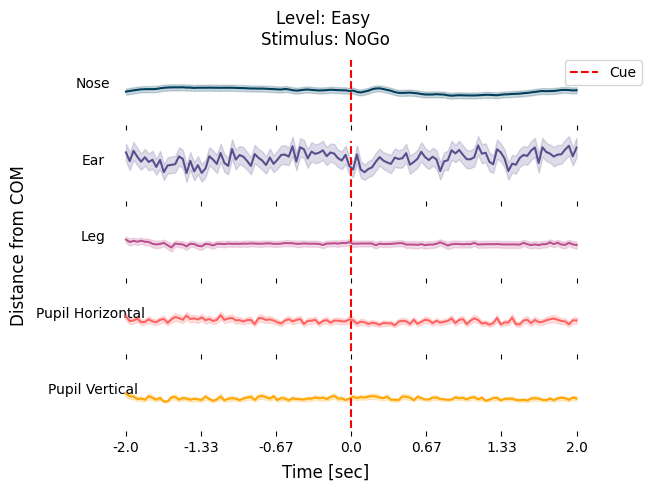

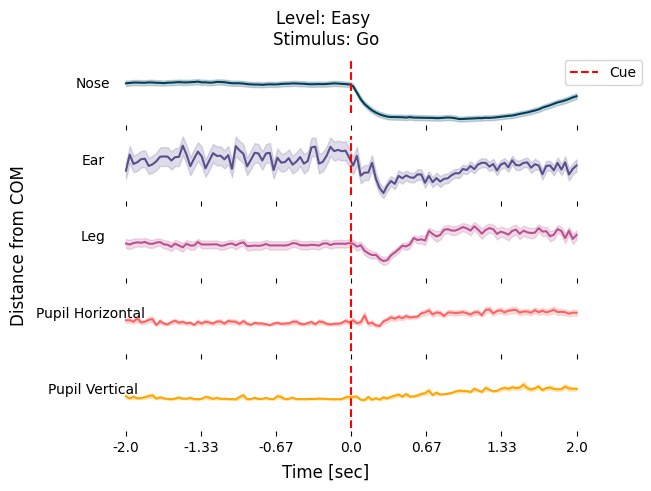

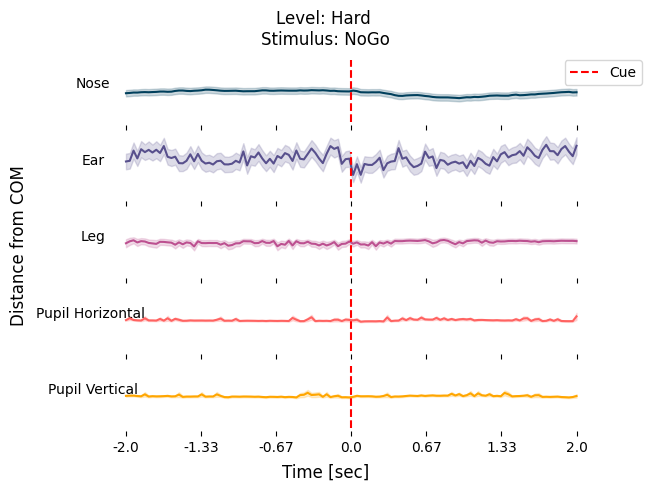

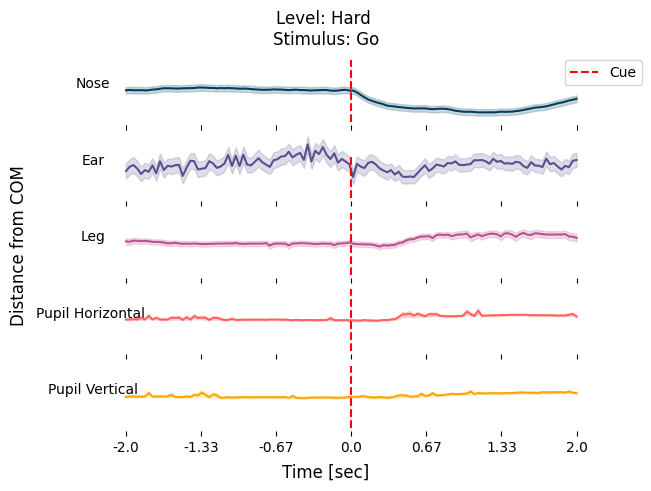

In [10]:
subjects = np.unique(name)
levels = np.unique(level)
stimuli = np.unique(stimuli_type)

body_parts = ["Nose", "Ear", "Leg", "Pupil Horizontal ", "Pupil Vertical"]
colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]

for lev in levels:
    for stim in stimuli:
        one = np.where(level == lev)[0]
        two = np.where(stimuli_type == stim)[0]
        trails = np.intersect1d(one, two)
        plot_trajectory(X, lev, stim, trails, body_parts, colors)
